In [2]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def modelar(a,b,tiradas, caras):
    model_one = pm.Model()
    with model_one:
        theta = pm.Beta('theta', a, b)
        k = pm.distributions.discrete.Binomial('k', tiradas, theta, observed = caras)
        k_predicho = pm.distributions.discrete.Binomial('k_predicho', 1, theta)

        trace = pm.sample(1000)
        pm.traceplot(trace)
        plt.show()
        
        map_estimate = pm.find_MAP()
        print(map_estimate)
        print(pm.summary(trace))
        

Para esta prueba se supuso una beta(1,1), por lo que no se tiene una idea clara si la moneda está cargada a priori o no.

El resultado de las 6 caras observadas modificó mucho la suposición.

El máximo a posteriori es 0.992 si se toma el valor del sampleo (depende del random de sampleo, puede variar) o 0.8571 si se estima.

La predicción lógicamente tiende fuertemente a que la moneda sea cara.

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
 98%|█████████▊| 1471/1500 [00:02<00:00, 575.66it/s]/usr/local/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.882626365043, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 1500/1500 [00:02<00:00, 575.00it/s]


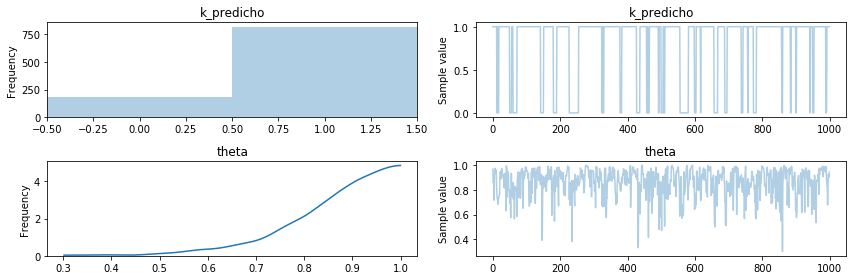

logp = -4.852, ||grad|| = 2.5: 100%|██████████| 8/8 [00:00<00:00, 944.61it/s]

{'theta_logodds__': array(1.7917593382745627), 'k_predicho': array(0), 'theta': array(0.857142841107735)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.817            0.387            0.029            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.863            0.112            0.006            [0.643, 0.999]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.577          0.809          0.889          0.947          0.

In [13]:
modelar(1,1,6,6)

Para esta prueba se supuso una beta(50,50) (No funciona con betas de 100,100).
Es una suposición fuerte indicando que la moneda no se encuentra cargada.

El resultado de las 6 caras observadas modificó levemente la suposición.

El máximo a posteriori es 0.632 si se toma el valor del sampleo o 0.5238 si se estima.

La predicción no marca una diferencia amplia entre cara o cruz, pero tiende levemente a la cara.

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
100%|██████████| 1500/1500 [00:02<00:00, 545.40it/s]


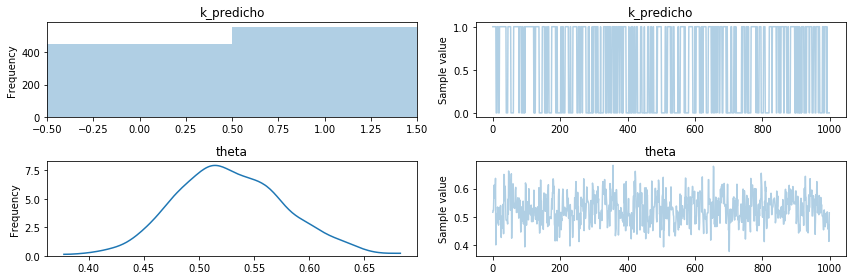

logp = -2.7777, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 829.41it/s]

{'theta_logodds__': array(0.0953101796163084), 'k_predicho': array(0), 'theta': array(0.5238095237626262)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.553            0.497            0.026            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.528            0.049            0.002            [0.446, 0.636]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.438          0.495          0.525          0.561          0

In [15]:
modelar(50,50,6,6)

Para el caso del priors beta(1,1), la situación con 20 caras hace que la predicción tienda extremadamente a favor de la cara.
Incluso para el caso de las 3 caras, la suposición previa es tan débil que permite que la distribución tienda hacia una probabilidad alta de cara.

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
 98%|█████████▊| 1463/1500 [00:03<00:00, 425.67it/s]/usr/local/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1500/1500 [00:03<00:00, 426.10it/s]


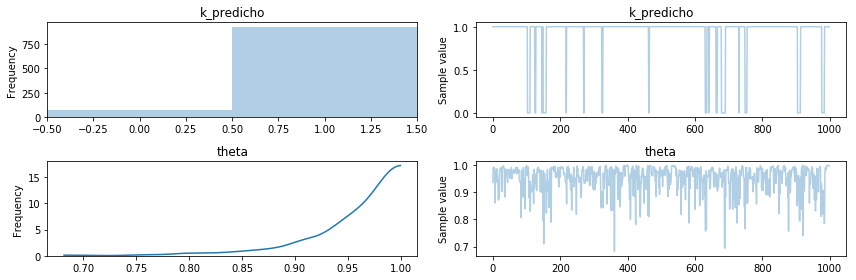

logp = -14.556, ||grad|| = 9.5: 100%|██████████| 10/10 [00:00<00:00, 1403.11it/s]


{'theta_logodds__': array(2.995732186168405), 'k_predicho': array(0), 'theta': array(0.9523809484178871)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.924            0.265            0.019            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.952            0.049            0.002            [0.846, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.810          0.936          0.967          0.986          0.

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
100%|██████████| 1500/1500 [00:02<00:00, 516.92it/s]


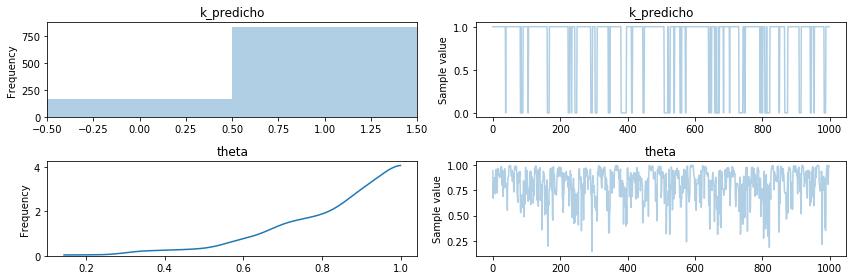

logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 962.14it/s]

{'theta_logodds__': array(1.0986106576288082), 'k_predicho': array(0), 'theta': array(0.7499996941800062)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.832            0.374            0.026            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.810            0.163            0.009            [0.466, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.378          0.717          0.857          0.939          0

In [20]:
modelar(1,1,20,20)
modelar(1,1,3,3)

En el caso de la beta(50,50) se ve como es más dificil hacer que la predicción siguiente sea cara.

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
100%|██████████| 1500/1500 [00:03<00:00, 477.02it/s]


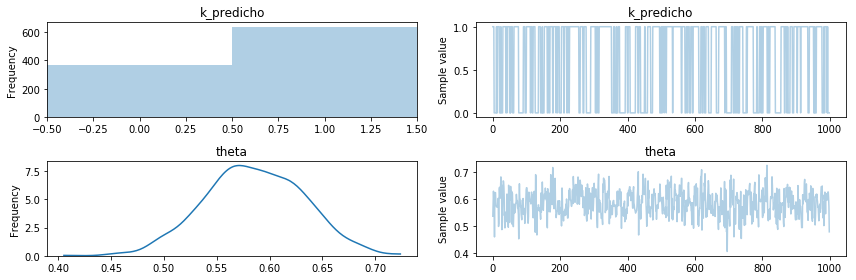

logp = -12.482, ||grad|| = 9.5: 100%|██████████| 6/6 [00:00<00:00, 860.84it/s]


{'theta_logodds__': array(0.322083490898717), 'k_predicho': array(0), 'theta': array(0.5798319307582185)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.634            0.482            0.028            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.584            0.046            0.002            [0.492, 0.670]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.494          0.553          0.584          0.618          0.

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
100%|██████████| 1500/1500 [00:02<00:00, 530.56it/s]


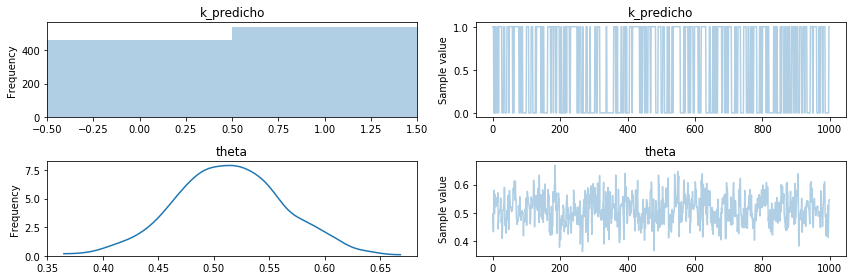

logp = -0.6983, ||grad|| = 1: 100%|██████████| 5/5 [00:00<00:00, 678.71it/s]

{'theta_logodds__': array(0.039220422553712275), 'k_predicho': array(0), 'theta': array(0.5098038489466665)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.538            0.499            0.027            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.513            0.049            0.002            [0.423, 0.612]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.417          0.481          0.513          0.546         

In [19]:
modelar(50,50,20,20)
modelar(50,50,3,3)

Ambos priors elegidos parecen ser bastante extremos. El primero por lo fácil que es modificarlo con nuevos datos, casi no tiene peso. El segundo por lo contrario, uno razonablemente diría después de 20 caras seguidas que la moneda tiene bastantes probabildades de estar cargadas, pero se ve que afecte tanto distribución de theta. 

Para considerar a una moneda cargada se hizo una pequeña encuesta y se llegó a un promedio de 6 caras seguidas. Viendo distintas opciones de priors se consideró una beta(10,10) razonable.

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_predicho
100%|██████████| 1500/1500 [00:02<00:00, 620.72it/s]


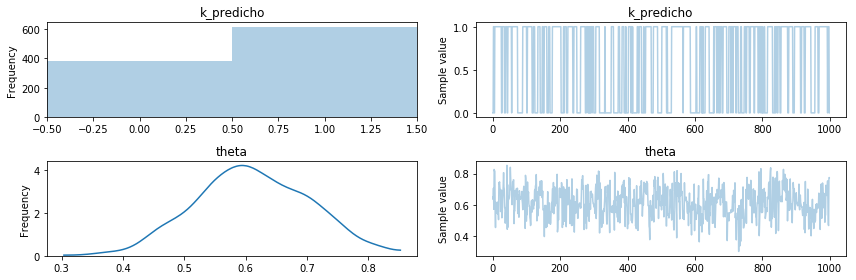

logp = -3.5924, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 975.42it/s]

{'theta_logodds__': array(0.4054651032482101), 'k_predicho': array(0), 'theta': array(0.599999998833611)}

k_predicho:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.615            0.487            0.030            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.611            0.092            0.005            [0.427, 0.777]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.440          0.549          0.608          0.679          0.

In [22]:
modelar(10,10,6,6)

El modelo parece razonable a lo que se tenía pensado. La idea de que la moneda está cargada se muestra bastante claro con los resultados.